In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import numpy as np
import seaborn as sns
from pandas import DataFrame

In [9]:
file = r"C:\Users\panna\Downloads\mfnn9bh42m-1\BOUN_DDoS dataset\BOUN_TCP_Anon.csv"
file1 = r"C:\Users\panna\Downloads\mfnn9bh42m-1\BOUN_DDoS dataset\BOUN_UDP_Anon.csv"
file2 = r"C:\Users\panna\Downloads\mfnn9bh42m-1\BOUN_DDoS dataset\boun_tcp_Anon1.csv"
dataset = read_csv(file2, low_memory=False)
dataset = dataset[["Time","TTL","SYN","ACK","Attack","Source_ip",'Frame_length']]
dataset["SYN"] = dataset["SYN"].fillna(0)
dataset["ACK"] = dataset["ACK"].fillna(0)
dataset["SYN"] = dataset["SYN"].replace(['Set','Not set'],[1,0])
dataset["ACK"] = dataset["ACK"].replace(['Set','Not set'],[1,0])
dataset["Time"] = dataset["Time"].fillna(0)
#dataset["Attack_type"] = dataset["Attack_type"].fillna("BENIGN")
dataset["Time"] = dataset["Time"].astype(np.uint32)
S=[]
packetno = 1
M=[]
bits = 0
for i in range(1,len(dataset)):
    if dataset.loc[i,'Time']>=(dataset.loc[i-1,'Time'])+1 or dataset.loc[i,'Attack']!=dataset.loc[i-1,'Attack']:
        M = set(M)
        unique_ips = len(M)
        Attack_type = dataset.loc[i,"Attack"]
        S.append([packetno,unique_ips,bits,Attack_type])
        packetno = 0
        bits = 0
        M = []
    else:
        bits += dataset.loc[i,'Frame_length']
        M.append(dataset.loc[i,'Source_ip'])
        packetno += 1
S.append([packetno,unique_ips,bits,Attack_type])
S = DataFrame(S,columns = ['packetno','unique_ips','bits','Attack_type'])
S = S.dropna()
print(S)
print(S.describe())
print(S.groupby("Attack_type").size())

     packetno  unique_ips     bits Attack_type
0         676         675  43200.0      TCPSYN
1         861         861  55104.0      TCPSYN
2         871         871  55744.0      TCPSYN
3         863         863  55232.0      TCPSYN
4         854         854  54656.0      TCPSYN
..        ...         ...      ...         ...
335         0           0      0.0      BENIGN
337         0           0      0.0      BENIGN
339         0           0      0.0      BENIGN
341         0           0      0.0      BENIGN
342       135           0  76635.0      BENIGN

[268 rows x 4 columns]
          packetno   unique_ips          bits
count   268.000000   268.000000  2.680000e+02
mean   1492.488806  1443.735075  1.350850e+05
std    1307.550944  1307.539692  3.131167e+05
min       0.000000     0.000000  0.000000e+00
25%       0.000000     0.000000  0.000000e+00
50%    1339.500000  1198.500000  8.572800e+04
75%    2423.000000  2149.000000  1.550720e+05
max    4168.000000  4167.000000  2.982128e+0

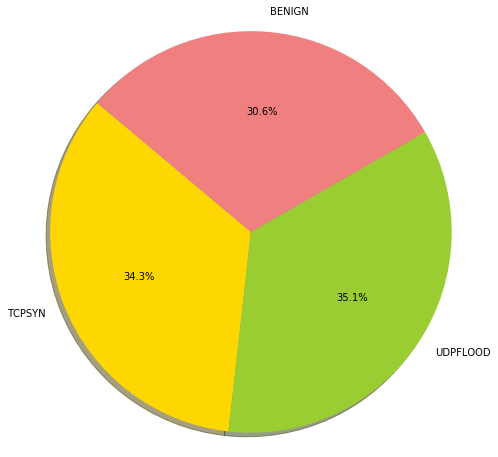

In [10]:
import matplotlib.pyplot as plt
labels = 'TCPSYN','UDPFLOOD','BENIGN'
sizes = [len(S[S["Attack_type"]=="TCPSYN"]),len(S[S["Attack_type"]=="UDPFLOOD"]),len(S[S["Attack_type"]=="BENIGN"])]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','yellow','purple','grey']
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()




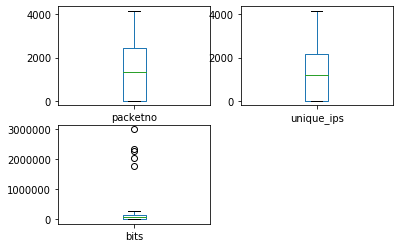

In [11]:
S.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

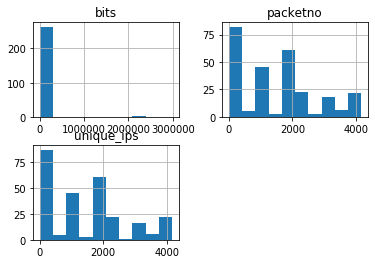

In [12]:
S.hist()
pyplot.show()

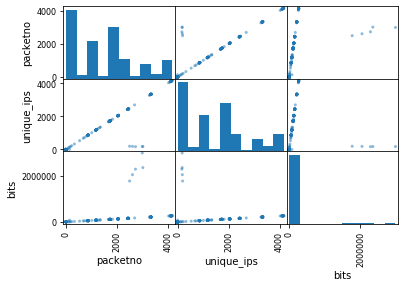

In [13]:
scatter_matrix(S)
pyplot.show()

In [14]:
array = S.values
print(array)

[[676 675 43200.0 'TCPSYN']
 [861 861 55104.0 'TCPSYN']
 [871 871 55744.0 'TCPSYN']
 ...
 [0 0 0.0 'BENIGN']
 [0 0 0.0 'BENIGN']
 [135 0 76635.0 'BENIGN']]


In [15]:
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [18]:
...
# Spot Check Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.827273 (0.055824)
KNN: 0.948268 (0.039134)
CART: 0.943506 (0.041188)
NB: 0.836580 (0.056669)


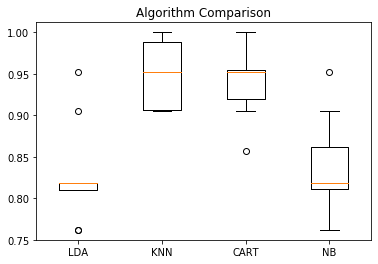

In [19]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()